<a href="https://colab.research.google.com/github/StephanyChanelo/IntroduccionCienciasPlanetarias/blob/main/Python_for_astronomers4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCCIÓN AL PROCESAMIENTO DIGITAL DE IMÁGENES APLICADO A LAS CIENCIAS PLANETARIAS**
#ESCUELA NACIONAL DE ESTUDIOS SUPERIORES UNIDAD MORELIA

La búsqueda de planetas que giran entorno a otras estrellas tiene como objetivo responder algunas de las más grandes interrogantes, ¿existen otros planetas?,
¿existen planetas como la Tierra?, ¿hay planetas que puedan albergar vida?
Por otra parte, encontrar planetas fuera del Sistema Solar (exoplanetas) es la misión de al menos cuatro satélites espaciales: Kepler, Corot, Most y Tess.

Sin embargo, cualquier planeta es una fuente de luz muy débil en comparación con su estrella. Por lo que, además de la dificultad intrínseca de la detección de una fuente de luz, tenue, la luz de la estrella complica aún más esta tarea. Por estas razones, muy pocos de los exoplanetas reportados a partir de abril de 2014 han sido observados directamente. En general, se recurre a métodos indirectos para detectar planetas extrasolares, entre los cuales se encuentran:

* **Velocidad radial:** El cual consiste en observar modulaciones del efecto Doppler en la estrella, lo que claramente
indica que un objeto masivo orbita muy cerca alrededor de la misma.
* **Microlentes gravitacionales:** Este método consiste en aprovechar la geometría del sistema planetario de estudio de tal manera que cuando un planeta pasa por enfrente de una estrella de fondo, este distorsiona el espacio y magnifica la luz proveniente de dicha estrella.


#**Tránsito planetario**

Consiste en observar fotométricamente la estrella y detectar sutiles cambios en la intensidad de su luz cuando un planeta orbita por delante de ella; el planeta bloquea una fracción del disco de la estrella, haciendo que disminuya su brillo dependiendo del tamaño del mismo. Dado que el planeta orbita alrededor de la estrella, la variación en el brillo es periódica. Entonces al medir el tiempo de duración del tránsito, el período con que este evento ocurre y la disminución en el brillo de la estrella es posible determinar los parámetros del sistema estelar de estudio tales como el tamaño de la órbita, la temperatura y el tamaño relativo del planeta.

![alt text](https://www.microsiervos.com/images/COROT-brightness.jpg)


#**Imagen**
Una imagen se define como una función de dos dimensiones f(x,y) donde x e y son las coordenadas de un plano que contiene todos los puntos de la misma, y f(x,y) es la amplitud en el punto (x,y) a la cual se le llama intensidad o nivel de gris de la imagen en ese punto. En el caso de que tanto las coordenadas x e y como los valores de intensidad de la función f sean discretos y finitos, se habla de una imagen digital.


Una imagen digital está compuesta de un número finito de elementos y cada uno tiene una localidad y un valor particular. A estos elementos se les llama puntos elementales de la imagen o **píxeles**, siendo este último el término comúnmente utilizado para denotar la unidad mínima de medida de una imagen digital. 

![alt text](https://miro.medium.com/max/693/1*bV7S0zACdidh11ikjYpLpQ.png)


**Imagen de color** \\
El fundamento para describir una imagen digital en color es similar con la diferencia de que cada píxel es descrito y codificado de otraforma, según el espacio de color que se esté utilizando. Así por ejemplo, para un espacio de color
RGB (generalmente el más usado para representar imágenes), se representa cada píxel como un
color creado a partir de ciertas cantidades de los colores rojo, verde y azul. Esta
representación se puede interpretar como una matriz de tres niveles de intensidad, donde cada
nivel corresponde a la intensidad de color de las componentes rojo, verde y azul.



![alt text](https://www.researchgate.net/profile/Bhupendra_Pratap_Singh/publication/282798184/figure/fig15/AS:283989639221249@1444719814399/Color-image-representation-and-RGB-matrix.png)




Carga de imágenes

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1r_536WlCKAwxO3dNDiRfsFIhG087GPCf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1r_536WlCKAwxO3dNDiRfsFIhG087GPCf" -O transito2021.zip && rm -rf /tmp/cookies.txt
!unzip transito2021.zip

--2022-05-23 20:58:37--  https://docs.google.com/uc?export=download&confirm=&id=1r_536WlCKAwxO3dNDiRfsFIhG087GPCf
Resolving docs.google.com (docs.google.com)... 108.177.126.138, 108.177.126.100, 108.177.126.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jt20d5jjdpiglfqisnhk162m5d8ocrmj/1653339450000/18020599704410039587/*/1r_536WlCKAwxO3dNDiRfsFIhG087GPCf?e=download [following]
--2022-05-23 20:58:38--  https://doc-0o-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jt20d5jjdpiglfqisnhk162m5d8ocrmj/1653339450000/18020599704410039587/*/1r_536WlCKAwxO3dNDiRfsFIhG087GPCf?e=download
Resolving doc-0o-3o-docs.googleusercontent.com (doc-0o-3o-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-0o-3o-docs.googleusercontent.com (doc-0

In [ ]:
#CARGA DE IMÁGENES DESDE PC
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# importamos el modulo pyplot, y lo llamamos plt
import matplotlib.pyplot as plt
from skimage import io

Método de procesamiento

1. Extraer información general.
2. Escalar la imagen (normalización).
3. Recortar imagen en zona de interés
4. Procesamiento para extracción de características.
5. Comprobación (en caso de que sea posible).

In [ ]:
from PIL import Image

#Open the image
image = Image.open('transito/20.gif')
image0 = Image.open('transito/4.gif')
plt.imshow(image) 

#INFORMATION OF THE ORIGINAL IMAGE
# The file format of the source file.
print("Formato:", image.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Dimensiones de la imagen:", image.size) 

In [ ]:
new_image = image.resize((256, 256))
new_image0 = image0.resize((256, 256))
print("Dimensiones de la imagen:", new_image.size) # Output: (256, 256))

In [ ]:
#Box to crop the image [x0, y0, x_c, y_c]
box = (40, 0, 200, 160)                 
cropped_image = new_image.crop(box)
cropped_image0 = new_image0.crop(box)
plt.imshow(cropped_image) 
print(cropped_image.size) 

Binarización de la imagen

Se refiere al proceso de convertir la imagen en color a blanco y negro.
Es una técnica que consiste en la realización de
un barrido en la matriz de la imagen digital con el fin de que el proceso produzca la reducción de la escala de grises a dos únicos valores. Negro
(= 0) y blanco (= 255), o lo que es lo mismo, un sistema binario de ausencia y presencia de color 0-1. La comparación de cada píxel de la imagen viene determinada por el umbral de sensibilidad (valor T = Threshold). Por ejemplo, los valores que sean mayores que el umbral toman un valor 255 (blanco) y los menores 0 (negro).

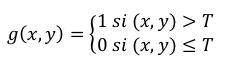

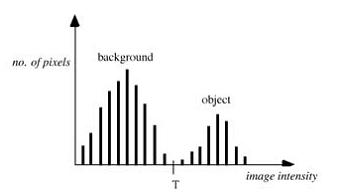

Esta técnica de umbralización supone que la imagen posee un histograma bimodal, y por lo tanto, el objeto puede ser extraído del resto de la imagen mediante una simple operación que compare los valores de la imagen con el valor umbral T.
El resultado es una imagen binaria, donde los píxeles con valores de intensidad igual a 1 corresponden al objeto deseado; mientras que los píxeles con valor 0, corresponder al resto de la imagen.


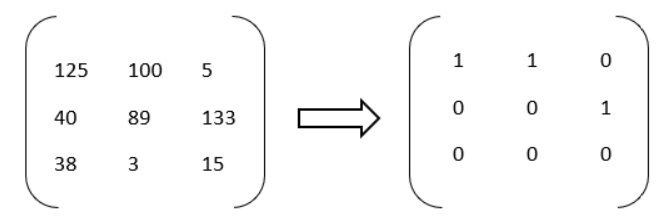

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

a = np.asarray(cropped_image,dtype=np.float32)
a0 = np.asarray(cropped_image0,dtype=np.float32)

ret0,thresh0 = cv2.threshold(a0,160,160,cv2.THRESH_BINARY)
ret,thresh1 = cv2.threshold(a,160,160,cv2.THRESH_BINARY)
plt.imshow(thresh1,'gray')

Extracción de información

A partir del proceso de binarización es posible obtener las matrices correspondientes a la imagen y extraer la información de interés. En este caso construiremos la curva de intensidad de luz durante el tránsito de un planeta.


In [ ]:
#Intensity/Luminosity values
n=np.sum(thresh1)
n

Ciclo para la determinación de la curva de luminosidad

In [ ]:
curva=[]
for i in range(45):
  dir="/content/transito/"+str(i)+'.gif'

  img = Image.open(dir)
  new_image = img.resize((256, 256))
  box = (40, 0, 200, 160)                 
  cropped_image = new_image.crop(box)
  a = np.asarray(cropped_image,dtype=np.float32)
  ret,thresh = cv2.threshold(a,160,160,cv2.THRESH_BINARY_INV)
  n=np.sum(thresh)
  curva=np.append(curva, n)

curva

In [ ]:
plt.plot(curva)
plt.suptitle('LUMINOSITY CURVE')
plt.ylabel('Intensity')
plt.xlabel('Time')
plt.show()

El método de fotométrica puede determinar el radio del planeta. Si un planeta cruza delante del disco de su estrella, a continuación, el brillo visual observado de la estrella cae por una pequeña cantidad, dependiendo de los tamaños relativos de la estrella y el planeta. Un tránsito teórica exoplaneta modelo de curva de luz predice las siguientes características de un sistema planetario observada: profundidad de tránsito (delta), la duración de tránsito (T), la entrada / salida duración (τ), y el período del exoplaneta (P). Sin embargo, estas cantidades observadas se basan en varios supuestos. 

Por conveniencia en los cálculos, se supone que el planeta y la estrella son esféricas, el disco estelar es uniforme, y la órbita es circular.

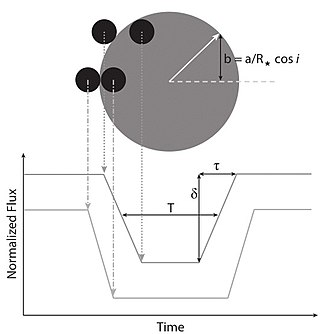

* La profundidad de tránsito (δ) de una curva de luz en tránsito describe la disminución en el flujo normalizado de la estrella durante un tránsito. Esto detalla el radio de un exoplaneta en comparación con el radio de la estrella.

* La duración de tránsito (T) de un exoplaneta, este parámetro observado cambios con respecto a qué tan rápido o lento un planeta se mueve en su órbita, ya que transita la estrella. 

* La duración de ingreso / egreso (τ) de una curva de luz en tránsito describe la longitud de tiempo que el planeta necesita para cubrir la totalidad de la estrella.

**Ejercicios**
1. Determinar la masa del planeta a partir de los valores, asumiento la densidad para un planeta similar a Júpiter ($\rho = 1.5 g/cm^3$): 

$F_{Notransito}=$

$F_{Transito}=$

$$ \frac{F_{No transito}-F_{Transito}}{F_{No transito}} = \frac{\pi R_p^2}{\pi R_{*}^2}$$

2. Calcular la órbita del planeta, asumiendo la masa de Rigel (18 M☉) y un período de 512 días terrestres. **Hint: Tercera Ley de Kepler.**